# Code 5
- Combine all Strategy
  - Missing Value Imputation
  - Outlier Startegy
  - Tranformation Strategy

## 1/ Import Libraries

In [1]:
#CodeSection1
# from google.colab import drive
# drive.mount('/mntDrive') 

In [2]:
#CodeSection2
import pandas as pd
import numpy as np

## 2/ Import Data

In [4]:
#CodeSection3
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## 3/ Combine both Datasets (train, test)

In [5]:
#CodeSection4
all_data = [train, test]

### Check Combined Data 
- Missing Value
- Data Types

In [6]:
#CodeSection5
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

In [7]:
#CodeSection6
# Check Data types for each variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [8]:
#numerical_features = ['city_development_index', 'training_hours']
#categorical_features = ['city','gender', 'relevent_experience', 'enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

## 4/ Numerical Processing

### 4.1/ Impute Numerical Variables
-NA

### 4.2/ Outlier Strategy

In [9]:
import seaborn as sns

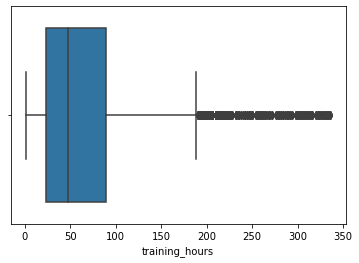

In [12]:
sns.boxplot(train['training_hours'])

In [13]:
#CodeSection11
numerical_features = ['city_development_index', 'training_hours']
# Write a loop to detect and impute Outliers
for num_var in numerical_features:

    Q1 = train[num_var].quantile(0.25)
    Q3 = train[num_var].quantile(0.75)

    IQR = Q3-Q1

    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR

    for dataset in all_data:
        dataset[num_var] = dataset[num_var].apply(lambda x : Upper_Whisker if x > Upper_Whisker else x)
        dataset[num_var] = dataset[num_var].apply(lambda x : Lower_Whisker if x < Lower_Whisker else x)
        

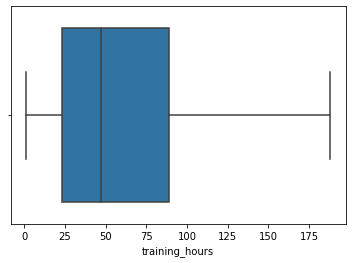

In [14]:
sns.boxplot(train['training_hours'])

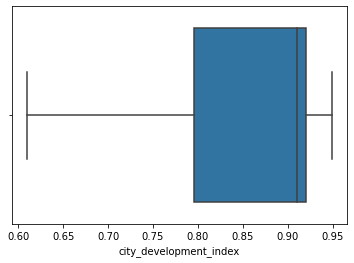

In [15]:
sns.boxplot(train['city_development_index'])

### 4.3/ Transformation Strategy

In [16]:
#CodeSection12
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

In [17]:
#CodeSection13

#Initiate StandardScaler
num_scale = StandardScaler()

# Fit StandardScaler
num_scale.fit(train[numerical_features])

StandardScaler()

In [18]:
#CodeSection14
# Scale Train and Test
for datasets in all_data:
    datasets[numerical_features]=num_scale.transform(datasets[numerical_features])

## 5/ Impute Categorical Variables

### Impute all Categorical Variables at once

In [19]:
#CodeSection15
# Identify all Categorical Features
categorical_features = ['city','gender', 'relevent_experience', 'enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']

In [20]:
#CodeSection16
# Import SimpleImputer
from sklearn.impute import SimpleImputer

In [21]:
#CodeSection17

#Initiate SimpleImputer
cat_impute = SimpleImputer(strategy='most_frequent')

# Fit SimpleImputer
cat_impute.fit(datasets[categorical_features])

SimpleImputer(strategy='most_frequent')

In [22]:
#CodeSection18
# Impute Train and Test
for datasets in all_data:
    datasets[categorical_features]=cat_impute.transform(datasets[categorical_features])

## 6/ Now Re Check all Features

In [23]:
#CodeSection19
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                        0
relevent_experience           0
enrolled_university           0
education_level               0
major_discipline              0
experience                    0
company_size                  0
company_type                  0
last_new_job                  0
training_hours                0
target                    15021
dtype: int64

## 8/ Prepare Data for Model Model

In [24]:
#CodeSection20
# Check First 5 Rows of Test Data
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,-2.249657,Male,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,1,-0.935500
1,12036,city_28,0.850692,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,0.615088
2,11061,city_103,0.671645,Male,No relevent experience,Full time course,Graduate,STEM,3,50-99,Pvt Ltd,1,-0.896244
3,5032,city_104,0.709339,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,0.261790
4,17599,city_77,-0.176475,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,0.045885


In [25]:
#CodeSection21
# Get X and y Variables for your Dataset
X=train.drop(['enrollee_id','target'], axis=1)
y= train['target']

### Create Dummy Variables for  Categorical Variables

In [26]:
#CodeSection22
# Get Dummy Variables
X = pd.get_dummies(X, drop_first = True)  # Keep only n - 1 Variables - Use "drop_first = True"

## 9/ Build Model

In [27]:
#CodeSection23
#Import Logistic Regression Library
from sklearn.linear_model import LogisticRegression

#Initialize LR
clf = LogisticRegression(max_iter = 1000, class_weight='balanced')

In [28]:
#CodeSection24
# Fit Model
model = clf.fit(X, y)

### Check Accuracy of Model on Train Data

In [29]:
#CodeSection25
# Predict on Train Data
y_pred = model.predict(X)

### We can use a Accuracy Function from Metrics
- Check Train Accuracy

In [30]:
#CodeSection26
# Import metrics library
from sklearn.metrics import roc_auc_score

In [31]:
#CodeSection27
# get Actual "y" variables (use "y_true" as variable)
y_true = train['target']

In [32]:
#CodeSection28
# Print Train Accuracy
print(f" Train Accuracy : {roc_auc_score(y_true, y_pred):0.1%}")

 Train Accuracy : 63.3%


## 10/ Predict and Submit

### Predict

In [33]:
#CodeSection29
# Get all the X Variables from the Test Dataset
X_test = test.drop(['enrollee_id'], axis =  1)

In [34]:
#CodeSection30
#Covert to Dummies
X_test = pd.get_dummies(X_test, drop_first = True)

In [35]:
#CodeSection32
# Predict on X_test Data ("X_test_prep")
X_test_prep = model.predict(X_test)

### Create Submission File

In [36]:
#CodeSection33
submission = pd.DataFrame({
    'enrollee_id' : test['enrollee_id'],
    'target' : X_test_prep
})

### Export Submission File

In [37]:
#CodeSection34
submission.to_csv('output/O5_Preproccesing_All.csv', index = False)

In [ ]:
# LB Accuracy : 0.6222650027976495